<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Feature Selection using Filter, Wrapper, and Embedded Methods</h4>
    <p style="font-size: 20px;">NBA API Data (2022-2024)</p>
</div>

<a name="Feature-Selection"></a>

# Table of Contents

[Setup](#Setup)

[Data](#Data)

**[1. Total Points](#1.-Total-Points)**

- [1.1. Selection Parameters](#1.1.-Selection-Parameters)

- [1.2. Filter Methods](#1.2.-Filter-Methods)

- [1.3. Wrapper Methods](#1.3.-Wrapper-Methods)

- [1.4. Embedded Methods](#1.4.-Embedded-Methods)

**[2. Plus Minus](#2.-Plus-Minus)**

- [2.1. Selection Parameters](#2.1.-Selection-Parameters)
  
- [2.2. Filter Methods](#2.2.-Filter-Methods)

- [2.3. Wrapper Methods](#2.3.-Wrapper-Methods)

- [2.4. Embedded Methods](#2.4.-Embedded-Methods)

**[3. Game Winner](#3.-Game-Winner)**

- [3.1. Selection Parameters](#3.1.-Selection-Parameters)
  
- [3.2. Filter Methods](#3.2.-Filter-Methods)

- [3.3. Wrapper Methods](#3.3.-Wrapper-Methods)

- [3.4. Embedded Methods](#3.4.-Embedded-Methods)

**[4. Final Feature Set](#4.-Final-Feature-Set)**

# Setup

[Return to top](#Feature-Selection)

In [1]:
import sys
from pathlib import Path
# get current working directory
cwd = %pwd
# add shared_code directory to Python sys.path
sys.path.append(str(Path(cwd).parent / "shared_code"))
# import all libraries in shared_code directory 'imports.py' file
from imports import *
%matplotlib inline

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Data

[Return to top](#Feature-Selection)

In [2]:
# load all the rolling data
boxscores = pd.read_csv('../../data/processed/nba_team_matchups_rolling_box_scores_2022_2024_r05.csv')
opponent = pd.read_csv('../../data/processed/nba_team_matchups_rolling_opponent_impact_box_scores_2022_2024_r05.csv')
advanced = pd.read_csv('../../data/processed/nba_team_matchups_rolling_adv_stats_2021_2024_r05.csv')
hustle = pd.read_csv('../../data/processed/nba_team_matchups_rolling_hustle_stats_2021_2024_r05.csv')
miscbox = pd.read_csv('../../data/processed/nba_team_matchups_rolling_misc_box_stats_2021_2024_r05.csv')
factor = pd.read_csv('../../data/processed/nba_team_matchups_rolling_four_factor_stats_2021_2024_r05.csv')
scoring = pd.read_csv('../../data/processed/nba_team_matchups_rolling_scoring_box_stats_2021_2024_r05.csv')
track = pd.read_csv('../../data/processed/nba_team_matchups_rolling_player_track_box_stats_2021_2024_r05.csv')

In [3]:
# merge all the features
cols_to_drop = ['GAME_RESULT', 'TOTAL_PTS', 'PLUS_MINUS', 'HOME_TEAM_NAME',
                'SEASON_ID', 'GAME_DATE', 'AWAY_TEAM_NAME', 'ROLL_HOME_PTS', 'ROLL_AWAY_PTS']

all_features_df = boxscores.merge(opponent.drop([col for col in cols_to_drop if col in opponent.columns], axis=1), how='left', on='GAME_ID')
all_features_df = all_features_df.merge(advanced.drop([col for col in cols_to_drop if col in advanced.columns], axis=1), how='left', on='GAME_ID')
all_features_df = all_features_df.merge(hustle.drop([col for col in cols_to_drop if col in hustle.columns], axis=1), how='left', on='GAME_ID')
all_features_df = all_features_df.merge(miscbox.drop([col for col in cols_to_drop if col in miscbox.columns], axis=1), how='left', on='GAME_ID')
all_features_df = all_features_df.merge(factor.drop([col for col in cols_to_drop if col in factor.columns], axis=1), how='left', on='GAME_ID')
all_features_df = all_features_df.merge(scoring.drop([col for col in cols_to_drop if col in scoring.columns], axis=1), how='left', on='GAME_ID')
all_features_df = all_features_df.merge(track.drop([col for col in cols_to_drop if col in track.columns], axis=1), how='left', on='GAME_ID')

# iterate over columns and rename or drop if duplicated
for column in all_features_df.columns:
    if column.endswith('_x'):
        # rename column by removing '_x'
        new_column_name = column[:-2]  # Remove the last 2 characters '_x'
        all_features_df.rename(columns={column: new_column_name}, inplace=True)
    elif column.endswith('_y'):
        # drop column with '_y'
        all_features_df.drop(columns=[column], inplace=True)
        
all_features_df.to_csv('../../data/processed/nba_team_matchups_all_rolling_stats_merged_2021_2024_r05.csv', index=False)

print(all_features_df.shape)
all_features_df.head()

(3172, 256)


,GAME_ID,GAME_RESULT,TOTAL_PTS,PLUS_MINUS,HOME_TEAM_NAME,SEASON_ID,GAME_DATE,ROLL_HOME_PTS,ROLL_HOME_FGM,ROLL_HOME_FGA,ROLL_HOME_FG_PCT,ROLL_HOME_FG3M,ROLL_HOME_FG3A,ROLL_HOME_FG3_PCT,ROLL_HOME_FTM,ROLL_HOME_FTA,ROLL_HOME_FT_PCT,ROLL_HOME_OREB,ROLL_HOME_DREB,ROLL_HOME_REB,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,...,ROLL_HOME_CFGA,ROLL_HOME_CFG_PCT,ROLL_HOME_UFGM,ROLL_HOME_UFGA,ROLL_HOME_UFG_PCT,ROLL_HOME_DFGM,ROLL_HOME_DFGA,ROLL_HOME_DFG_PCT,ROLL_AWAY_DIST,ROLL_AWAY_ORBC,ROLL_AWAY_DRBC,ROLL_AWAY_RBC,ROLL_AWAY_TCHS,ROLL_AWAY_SAST,ROLL_AWAY_FTAST,ROLL_AWAY_PASS,ROLL_AWAY_CFGM,ROLL_AWAY_CFGA,ROLL_AWAY_CFG_PCT,ROLL_AWAY_UFGM,ROLL_AWAY_UFGA,ROLL_AWAY_UFG_PCT,ROLL_AWAY_DFGM,ROLL_AWAY_DFGA,ROLL_AWAY_DFG_PCT
0,22100002,0,235,-7.0,Los Angeles Lakers,2021-22,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22100001,1,231,23.0,Milwaukee Bucks,2021-22,2021-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22100007,1,253,11.0,Memphis Grizzlies,2021-22,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22100008,1,230,18.0,Minnesota Timberwolves,2021-22,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22100009,0,214,-20.0,New Orleans Pelicans,2021-22,2021-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# load, filter (by time) and scale data
pts_all_features, pm_all_features, res_all_features, test_set_obs = utl.load_and_scale_data(
    input_data=all_features_df,
    seasons_to_keep=['2021-22', '2022-23', '2023-24'],
    training_season='2021-22',
    feature_prefixes=['ROLL_', 'ROLLDIFF_'],
    scaler_type='minmax', 
    scale_target=False
)

Season 2021-22: 1186 games
Season 2022-23: 1181 games
Season 2023-24: 691 games
Total number of games across sampled seasons: 3058 games


In [5]:
pts_all_features.head()

,ROLL_HOME_PTS,ROLL_HOME_FGM,ROLL_HOME_FGA,ROLL_HOME_FG_PCT,ROLL_HOME_FG3M,ROLL_HOME_FG3A,ROLL_HOME_FG3_PCT,ROLL_HOME_FTM,ROLL_HOME_FTA,ROLL_HOME_FT_PCT,ROLL_HOME_OREB,ROLL_HOME_DREB,ROLL_HOME_REB,ROLL_HOME_AST,ROLL_HOME_STL,ROLL_HOME_BLK,ROLL_HOME_TOV,ROLL_HOME_PF,ROLL_AWAY_PTS,ROLL_AWAY_FGM,ROLL_AWAY_FGA,ROLL_AWAY_FG_PCT,ROLL_AWAY_FG3M,ROLL_AWAY_FG3A,ROLL_AWAY_FG3_PCT,...,ROLL_HOME_CFG_PCT,ROLL_HOME_UFGM,ROLL_HOME_UFGA,ROLL_HOME_UFG_PCT,ROLL_HOME_DFGM,ROLL_HOME_DFGA,ROLL_HOME_DFG_PCT,ROLL_AWAY_DIST,ROLL_AWAY_ORBC,ROLL_AWAY_DRBC,ROLL_AWAY_RBC,ROLL_AWAY_TCHS,ROLL_AWAY_SAST,ROLL_AWAY_FTAST,ROLL_AWAY_PASS,ROLL_AWAY_CFGM,ROLL_AWAY_CFGA,ROLL_AWAY_CFG_PCT,ROLL_AWAY_UFGM,ROLL_AWAY_UFGA,ROLL_AWAY_UFG_PCT,ROLL_AWAY_DFGM,ROLL_AWAY_DFGA,ROLL_AWAY_DFG_PCT,TOTAL_PTS
GAME_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-23,0.745,0.522,0.296,0.753,0.758,0.580,0.731,0.805,0.878,0.535,0.571,0.292,0.478,0.612,1.000,1.000,0.600,0.661,0.577,0.586,0.202,0.704,0.526,0.176,1.000,...,0.511,0.696,0.679,0.761,0.909,1.000,0.352,0.665,0.613,0.119,0.252,0.530,0.250,0.714,0.531,0.595,0.704,0.564,0.409,0.190,0.738,0.620,0.423,1.000,185
2021-10-23,0.000,0.000,0.648,0.000,0.076,0.412,0.000,0.466,0.534,0.438,1.000,0.381,0.826,0.000,0.420,0.273,0.657,0.576,0.096,0.017,0.362,0.000,0.421,0.588,0.364,...,0.138,0.000,0.359,0.000,0.909,0.655,0.762,0.619,0.387,0.489,0.409,0.579,0.125,0.179,0.517,0.000,0.458,0.000,0.364,0.453,0.301,0.185,0.269,0.453,198
2021-10-23,0.691,0.652,0.507,0.758,0.455,0.454,0.466,0.593,0.534,0.720,0.286,0.602,0.609,0.561,0.058,0.364,0.257,0.661,0.635,0.586,0.176,0.728,0.263,0.265,0.396,...,0.601,0.391,0.295,0.676,0.398,0.276,0.720,0.591,0.032,0.744,0.370,0.660,0.375,0.357,0.638,0.238,0.246,0.581,0.682,0.433,0.749,0.076,0.423,0.023,239
2021-10-23,0.727,0.826,0.683,0.827,0.530,0.244,0.772,0.297,0.382,0.315,0.571,0.159,0.348,0.918,0.275,0.182,0.029,0.661,0.250,0.069,0.122,0.225,0.368,0.559,0.317,...,0.746,0.739,0.808,0.712,0.455,0.586,0.291,0.715,0.452,0.460,0.409,0.460,0.375,0.179,0.403,0.357,0.282,0.735,0.136,0.372,0.075,0.511,0.346,0.965,232
2021-10-24,0.745,0.783,0.577,0.848,0.833,0.580,0.820,0.254,0.229,0.560,0.357,0.779,0.826,0.765,0.565,0.818,0.543,0.322,1.000,0.897,1.000,0.362,0.842,1.000,0.559,...,0.566,0.565,0.391,0.850,0.341,0.655,0.075,1.000,0.903,0.460,0.665,1.000,0.875,0.536,0.859,0.179,0.352,0.355,1.000,1.000,0.470,0.783,0.731,0.732,204


<a name="1.-Total-Points"></a>
# 1. Total Points

[Return to top](#Feature-Selection)

<a name="1.1.-Selection-Parameters"></a>
## 1.1. Selection Parameters

[Return to top](#Feature-Selection)

In [6]:
# train/test cut-off
SPLIT_DATE='2022-05-01'

# filter methods
CORR_THRESHOLD=0.1,
PAIRWISE_CORR_THRESHOLD=0.7
VIF_THRESHOLD=100.0
SECOND_STAGE_FILTER='feature_correlation'

# wrapper methods
ESTIMATOR=LinearRegression()
SELECTION_MODE='both'
COMBINE_MODE='intersection'

# embedded methods
PROP_IMPORTANCE=0.4, 
N_FEATURES=None

<a name="1.2.-Filter-Methods"></a>
## 1.2. Filter Methods

[Return to top](#Feature-Selection)

In [7]:
# filter-based feature selection
pts_filtered_features = utl.filter_feature_selection(
    df=pts_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='TOTAL_PTS',
    corr_threshold=CORR_THRESHOLD,
    second_stage_filter=SECOND_STAGE_FILTER,
    pairwise_corr_threshold=PAIRWISE_CORR_THRESHOLD,
    vif_threshold=VIF_THRESHOLD
)

Total time taken: 0.07 seconds

{
    "selected_by_outcome_correlation": [
        "ROLL_HOME_PTS",
        "ROLL_HOME_FGM",
        "ROLL_HOME_FG_PCT",
        "ROLL_HOME_FTM",
        "ROLL_HOME_FTA",
        "ROLL_HOME_AST",
        "ROLL_AWAY_PTS",
        "ROLL_AWAY_FGM",
        "ROLL_AWAY_FGA",
        "ROLL_AWAY_FG_PCT",
        "ROLL_AWAY_FTA",
        "ROLL_AWAY_AST",
        "ROLL_HOME_estimatedOffensiveRating",
        "ROLL_HOME_offensiveRating",
        "ROLL_HOME_estimatedDefensiveRating",
        "ROLL_HOME_defensiveRating",
        "ROLL_HOME_assistToTurnover",
        "ROLL_HOME_assistRatio",
        "ROLL_HOME_effectiveFieldGoalPercentage",
        "ROLL_HOME_trueShootingPercentage",
        "ROLL_HOME_estimatedPace",
        "ROLL_AWAY_estimatedOffensiveRating",
        "ROLL_AWAY_offensiveRating",
        "ROLL_AWAY_estimatedDefensiveRating",
        "ROLL_AWAY_defensiveRating",
        "ROLL_AWAY_assistToTurnover",
        "ROLL_AWAY_estimatedTeamTurnoverPercentag

<a name="1.3.-Wrapper-Methods"></a>
## 1.3. Wrapper Methods

[Return to top](#Feature-Selection)

In [8]:
# sequential feature selection
pts_selected_features = utl.sequential_feature_selection(
    df=pts_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='TOTAL_PTS', 
    filtered_features=pts_filtered_features['selected_by_outcome_and_feature_correlation'],
    estimator=ESTIMATOR,
    selection_mode=SELECTION_MODE,
    combine_mode=COMBINE_MODE
)

Total time taken: 2.25 seconds

{
    "intersection": [
        "ROLL_HOME_FTM",
        "ROLL_HOME_OPP_PTS_PAINT",
        "ROLL_HOME_PTS_PAINT",
        "ROLL_AWAY_PTS",
        "ROLL_HOME_PTS_FB",
        "ROLL_AWAY_OFF_LOOSE_BALLS_RECOVERED",
        "ROLL_AWAY_DEF_BOXOUTS",
        "ROLL_AWAY_estimatedPace",
        "ROLL_AWAY_PTS_PAINT",
        "ROLL_AWAY_DFG_PCT",
        "ROLL_HOME_AST",
        "ROLL_AWAY_assistToTurnover",
        "ROLL_HOME_OPP_TOV_PCT",
        "ROLL_HOME_estimatedDefensiveRating"
    ]
}


<a name="1.4.-Embedded-Methods"></a>
## 1.4. Embedded Methods

[Return to top](#Feature-Selection)

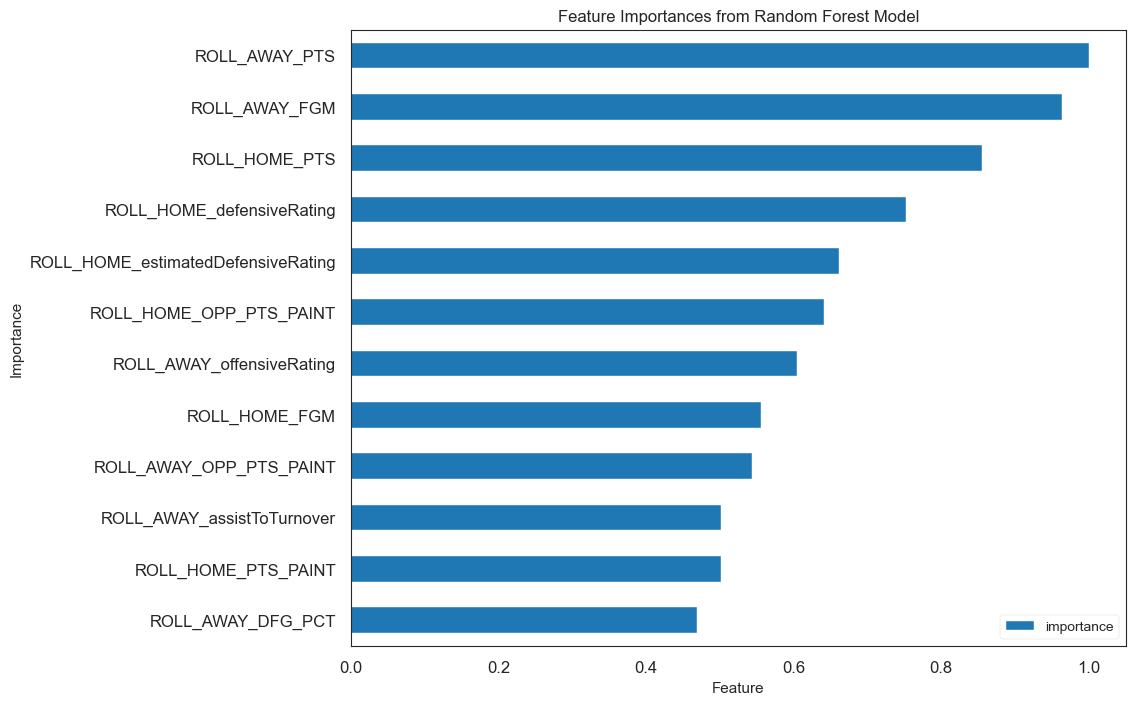

Total time taken: 1.45 seconds



In [9]:
pts_embedded_features = utl.embedded_feature_selection(
    df=pts_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='TOTAL_PTS', 
    prop_importance=PROP_IMPORTANCE, 
    n_features=N_FEATURES
)

<a name="2.-Plus-Minus"></a>
# 2. Plus Minus

[Return to top](#Feature-Selection)

<a name="2.1.-Selection-Parameters"></a>
## 2.1. Selection Parameters

[Return to top](#Feature-Selection)

In [10]:
# train/test cut-off
SPLIT_DATE='2022-05-01'

# filter methods
CORR_THRESHOLD=0.1,
PAIRWISE_CORR_THRESHOLD=0.7
VIF_THRESHOLD=100.0
SECOND_STAGE_FILTER='feature_correlation'

# wrapper methods
ESTIMATOR=LinearRegression()
SELECTION_MODE='both'
COMBINE_MODE='intersection'

# embedded methods
PROP_IMPORTANCE=0.5, 
N_FEATURES=None

<a name="2.2.-Filter-Methods"></a>
## 2.2. Filter Methods

[Return to top](#Feature-Selection)

In [11]:
# filter-based feature selection
pm_filtered_features = utl.filter_feature_selection(
    df=pm_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='PLUS_MINUS',
    corr_threshold=CORR_THRESHOLD,
    second_stage_filter=SECOND_STAGE_FILTER,
    pairwise_corr_threshold=PAIRWISE_CORR_THRESHOLD,
    vif_threshold=VIF_THRESHOLD
)

Total time taken: 0.07 seconds

{
    "selected_by_outcome_correlation": [
        "ROLL_HOME_PTS",
        "ROLL_HOME_FGM",
        "ROLL_HOME_FG_PCT",
        "ROLLDIFF_HOME_PTS",
        "ROLLDIFF_HOME_FGM",
        "ROLLDIFF_HOME_FG_PCT",
        "ROLLDIFF_HOME_DREB",
        "ROLLDIFF_HOME_REB",
        "ROLLDIFF_HOME_AST",
        "ROLLDIFF_HOME_BLK",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_AWAY_FGM",
        "ROLLDIFF_AWAY_FG_PCT",
        "ROLLDIFF_AWAY_AST",
        "ROLLDIFF_AWAY_STL",
        "ROLLDIFF_AWAY_TOV",
        "ROLL_HOME_estimatedOffensiveRating",
        "ROLL_HOME_offensiveRating",
        "ROLL_HOME_estimatedNetRating",
        "ROLL_HOME_netRating",
        "ROLL_HOME_assistToTurnover",
        "ROLL_HOME_assistRatio",
        "ROLL_HOME_effectiveFieldGoalPercentage",
        "ROLL_HOME_trueShootingPercentage",
        "ROLL_HOME_PIE",
        "ROLL_AWAY_estimatedDefensiveRating",
        "ROLL_AWAY_defensiveRating",
        "ROLL_AWAY_estimatedNetRatin

<a name="2.3.-Wrapper-Methods"></a>
## 2.3. Wrapper Methods

[Return to top](#Feature-Selection)

In [12]:
# sequential feature selection
pm_selected_features = utl.sequential_feature_selection(
    df=pm_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='PLUS_MINUS', 
    filtered_features=pm_filtered_features['selected_by_outcome_and_feature_correlation'],
    estimator=ESTIMATOR,
    selection_mode=SELECTION_MODE,
    combine_mode=COMBINE_MODE
)

Total time taken: 1.11 seconds

{
    "intersection": [
        "ROLLDIFF_AWAY_STL",
        "ROLL_HOME_CFG_PCT",
        "ROLL_AWAY_OPP_PTS_PAINT",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_HOME_PTS",
        "ROLL_HOME_SCREEN_ASSISTS",
        "ROLLDIFF_AWAY_AST",
        "ROLL_HOME_CFGA"
    ]
}


<a name="2.4.-Embedded-Methods"></a>
## 2.4. Embedded Methods

[Return to top](#Feature-Selection)

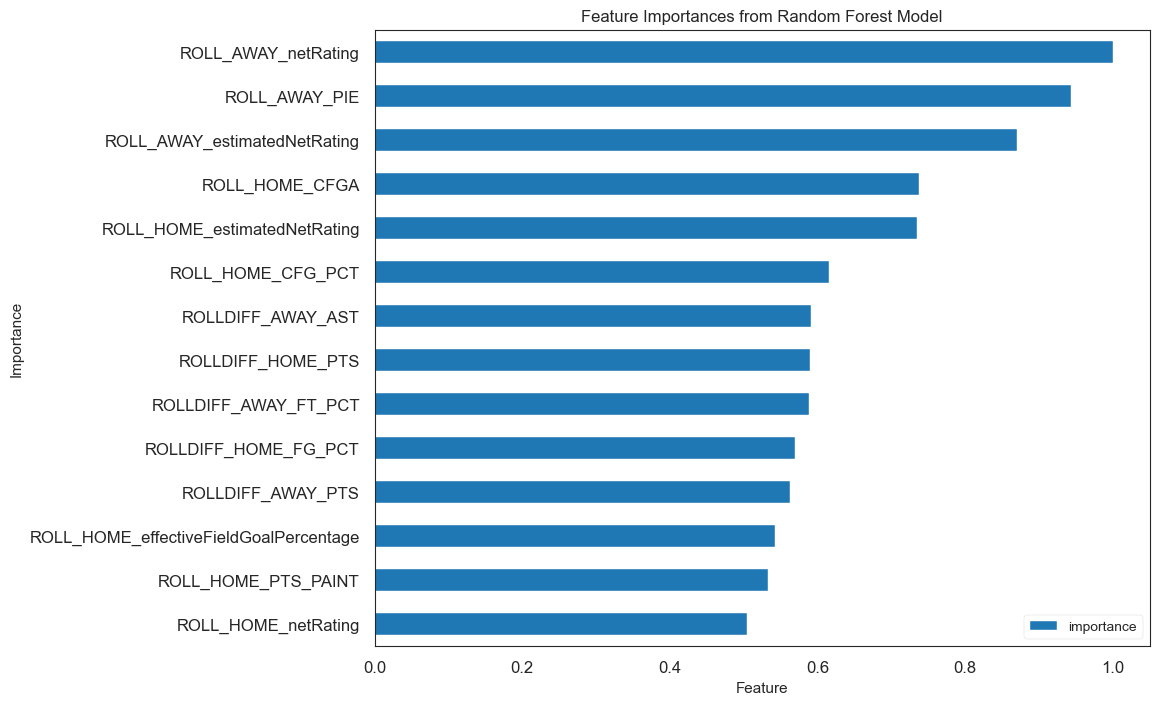

Total time taken: 1.38 seconds



In [13]:
pm_embedded_features = utl.embedded_feature_selection(
    df=pm_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='PLUS_MINUS', 
    prop_importance=PROP_IMPORTANCE, 
    n_features=N_FEATURES
)

<a name="3.-Game-Winner"></a>
# 3. Game Winner

[Return to top](#Feature-Selection)

<a name="3.1.-Selection-Parameters"></a>
## 3.1. Selection Parameters

[Return to top](#Feature-Selection)

In [14]:
# train/test cut-off
SPLIT_DATE='2022-05-01'

# filter methods
CORR_THRESHOLD=0.08,
PAIRWISE_CORR_THRESHOLD=0.7
VIF_THRESHOLD=100.0
SECOND_STAGE_FILTER='feature_correlation'

# wrapper methods
ESTIMATOR=LogisticRegression()
SELECTION_MODE='both'
COMBINE_MODE='intersection'

# embedded methods
PROP_IMPORTANCE=0.5, 
N_FEATURES=None

<a name="3.2.-Filter-Methods"></a>
## 3.2. Filter Methods

[Return to top](#Feature-Selection)

In [15]:
# filter-based feature selection
res_filtered_features = utl.filter_feature_selection(
    df=res_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='GAME_RESULT',
    corr_threshold=CORR_THRESHOLD,
    second_stage_filter=SECOND_STAGE_FILTER,
    pairwise_corr_threshold=PAIRWISE_CORR_THRESHOLD,
    vif_threshold=VIF_THRESHOLD
)

Total time taken: 0.07 seconds

{
    "selected_by_outcome_correlation": [
        "ROLL_HOME_PTS",
        "ROLL_HOME_FGM",
        "ROLL_HOME_FG_PCT",
        "ROLL_HOME_DREB",
        "ROLL_AWAY_PTS",
        "ROLL_AWAY_AST",
        "ROLL_AWAY_STL",
        "ROLLDIFF_HOME_PTS",
        "ROLLDIFF_HOME_FGM",
        "ROLLDIFF_HOME_FG_PCT",
        "ROLLDIFF_HOME_DREB",
        "ROLLDIFF_HOME_REB",
        "ROLLDIFF_HOME_AST",
        "ROLLDIFF_HOME_BLK",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_AWAY_FGM",
        "ROLLDIFF_AWAY_FG_PCT",
        "ROLLDIFF_AWAY_AST",
        "ROLLDIFF_AWAY_STL",
        "ROLLDIFF_AWAY_TOV",
        "ROLL_HOME_estimatedOffensiveRating",
        "ROLL_HOME_offensiveRating",
        "ROLL_HOME_estimatedDefensiveRating",
        "ROLL_HOME_defensiveRating",
        "ROLL_HOME_estimatedNetRating",
        "ROLL_HOME_netRating",
        "ROLL_HOME_reboundPercentage",
        "ROLL_HOME_effectiveFieldGoalPercentage",
        "ROLL_HOME_trueShootingPerce

<a name="3.3.-Wrapper-Methods"></a>
## 3.3. Wrapper Methods

[Return to top](#Feature-Selection)

In [16]:
# sequential feature selection
res_selected_features = utl.sequential_feature_selection(
    df=res_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='GAME_RESULT', 
    filtered_features=res_filtered_features['selected_by_outcome_and_feature_correlation'],
    estimator=ESTIMATOR,
    selection_mode=SELECTION_MODE,
    combine_mode=COMBINE_MODE
)

Total time taken: 13.97 seconds

{
    "intersection": [
        "ROLLDIFF_AWAY_STL",
        "ROLL_HOME_DREB",
        "ROLL_HOME_CFG_PCT",
        "ROLL_HOME_PTS",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_HOME_PTS",
        "ROLL_HOME_DIST"
    ]
}


<a name="3.4.-Embedded-Methods"></a>
## 3.4. Embedded Methods

[Return to top](#Feature-Selection)

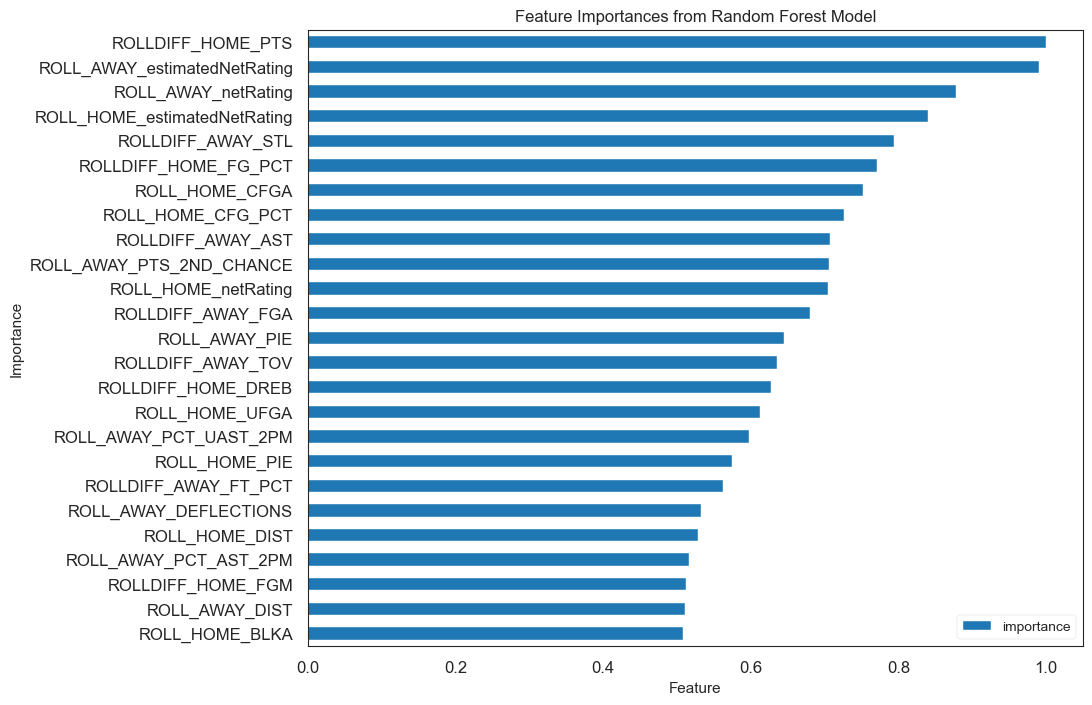

Total time taken: 1.37 seconds



In [17]:
res_embedded_features = utl.embedded_feature_selection(
    df=res_all_features, 
    split_date=SPLIT_DATE,
    outcome_name='GAME_RESULT', 
    prop_importance=PROP_IMPORTANCE, 
    n_features=N_FEATURES
)

<a name="4.-Final-Feature-Set"></a>
# 4. Final Feature Set

[Return to top](#Feature-Selection)

In [18]:
# store all selected features in a dictionary
selected_features_filter_and_wrapper = {
  'TOTAL_PTS': pts_selected_features[COMBINE_MODE],
  'PLUS_MINUS': pm_selected_features[COMBINE_MODE],
  'GAME_RESULT': res_selected_features[COMBINE_MODE],
}

# save the dictionary to a file
with open('../../data/selected_features/feature_set_01_filter_and_wrapper.json', 'w') as json_file:
    json.dump(selected_features_filter_and_wrapper, json_file, default=utl.handle_non_serializable, indent=4)

In [19]:
# print selected features
print(json.dumps(selected_features_filter_and_wrapper, indent=4))

{
    "TOTAL_PTS": [
        "ROLL_HOME_FTM",
        "ROLL_HOME_OPP_PTS_PAINT",
        "ROLL_HOME_PTS_PAINT",
        "ROLL_AWAY_PTS",
        "ROLL_HOME_PTS_FB",
        "ROLL_AWAY_OFF_LOOSE_BALLS_RECOVERED",
        "ROLL_AWAY_DEF_BOXOUTS",
        "ROLL_AWAY_estimatedPace",
        "ROLL_AWAY_PTS_PAINT",
        "ROLL_AWAY_DFG_PCT",
        "ROLL_HOME_AST",
        "ROLL_AWAY_assistToTurnover",
        "ROLL_HOME_OPP_TOV_PCT",
        "ROLL_HOME_estimatedDefensiveRating"
    ],
    "PLUS_MINUS": [
        "ROLLDIFF_AWAY_STL",
        "ROLL_HOME_CFG_PCT",
        "ROLL_AWAY_OPP_PTS_PAINT",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_HOME_PTS",
        "ROLL_HOME_SCREEN_ASSISTS",
        "ROLLDIFF_AWAY_AST",
        "ROLL_HOME_CFGA"
    ],
    "GAME_RESULT": [
        "ROLLDIFF_AWAY_STL",
        "ROLL_HOME_DREB",
        "ROLL_HOME_CFG_PCT",
        "ROLL_HOME_PTS",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_HOME_PTS",
        "ROLL_HOME_DIST"
    ]
}


In [20]:
# store all selected features in a dictionary
selected_features_embedded = {
  'TOTAL_PTS': pts_embedded_features,
  'PLUS_MINUS': pm_embedded_features,
  'GAME_RESULT': res_embedded_features,
}

# save the dictionary to a file
with open('../../data/selected_features/feature_set_02_embedded.json', 'w') as json_file:
    json.dump(selected_features_embedded, json_file, default=utl.handle_non_serializable, indent=4)

In [21]:
# print selected features
print(json.dumps(selected_features_embedded, indent=4))

{
    "TOTAL_PTS": [
        "ROLL_AWAY_DFG_PCT",
        "ROLL_HOME_PTS_PAINT",
        "ROLL_AWAY_assistToTurnover",
        "ROLL_AWAY_OPP_PTS_PAINT",
        "ROLL_HOME_FGM",
        "ROLL_AWAY_offensiveRating",
        "ROLL_HOME_OPP_PTS_PAINT",
        "ROLL_HOME_estimatedDefensiveRating",
        "ROLL_HOME_defensiveRating",
        "ROLL_HOME_PTS",
        "ROLL_AWAY_FGM",
        "ROLL_AWAY_PTS"
    ],
    "PLUS_MINUS": [
        "ROLL_HOME_netRating",
        "ROLL_HOME_PTS_PAINT",
        "ROLL_HOME_effectiveFieldGoalPercentage",
        "ROLLDIFF_AWAY_PTS",
        "ROLLDIFF_HOME_FG_PCT",
        "ROLLDIFF_AWAY_FT_PCT",
        "ROLLDIFF_HOME_PTS",
        "ROLLDIFF_AWAY_AST",
        "ROLL_HOME_CFG_PCT",
        "ROLL_HOME_estimatedNetRating",
        "ROLL_HOME_CFGA",
        "ROLL_AWAY_estimatedNetRating",
        "ROLL_AWAY_PIE",
        "ROLL_AWAY_netRating"
    ],
    "GAME_RESULT": [
        "ROLL_HOME_BLKA",
        "ROLL_AWAY_DIST",
        "ROLLDIFF_HOME_FGM",
   